# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

df = pd.read_csv(iris_url, header=None, names=columns)

df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
102,7.1,3.0,5.9,2.1,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
10,5.4,3.7,1.5,0.2,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
85,6.0,3.4,4.5,1.6,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
116,6.5,3.0,5.5,1.8,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
66,5.6,3.0,4.5,1.5,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa


#here

YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE
iris_data = pd.read_csv(iris_url, header=None, names=columns)
iris_data


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


YOUR ANSWERS HERE
1. sepal_length 
    is the length of the sepal, measured in cm. A sepal is the outer leaf that protects the flower. 
2. sepal_width 
    is the width of the speal, measured in cm. This indicates how big the flower may be.
3. petal_length 
    is the length of the petal, measured in cm. The petals are the inner portion of the flower. 
4. petal_width 
    is the width of the petal, measured in cm. This indicated how big the innner flower may be.
5. class 
    is the species of each iris. There are three classes: setosa, versicolor, and virginica. 

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

In [5]:
from sklearn.datasets import load_iris 
iris = load_iris()


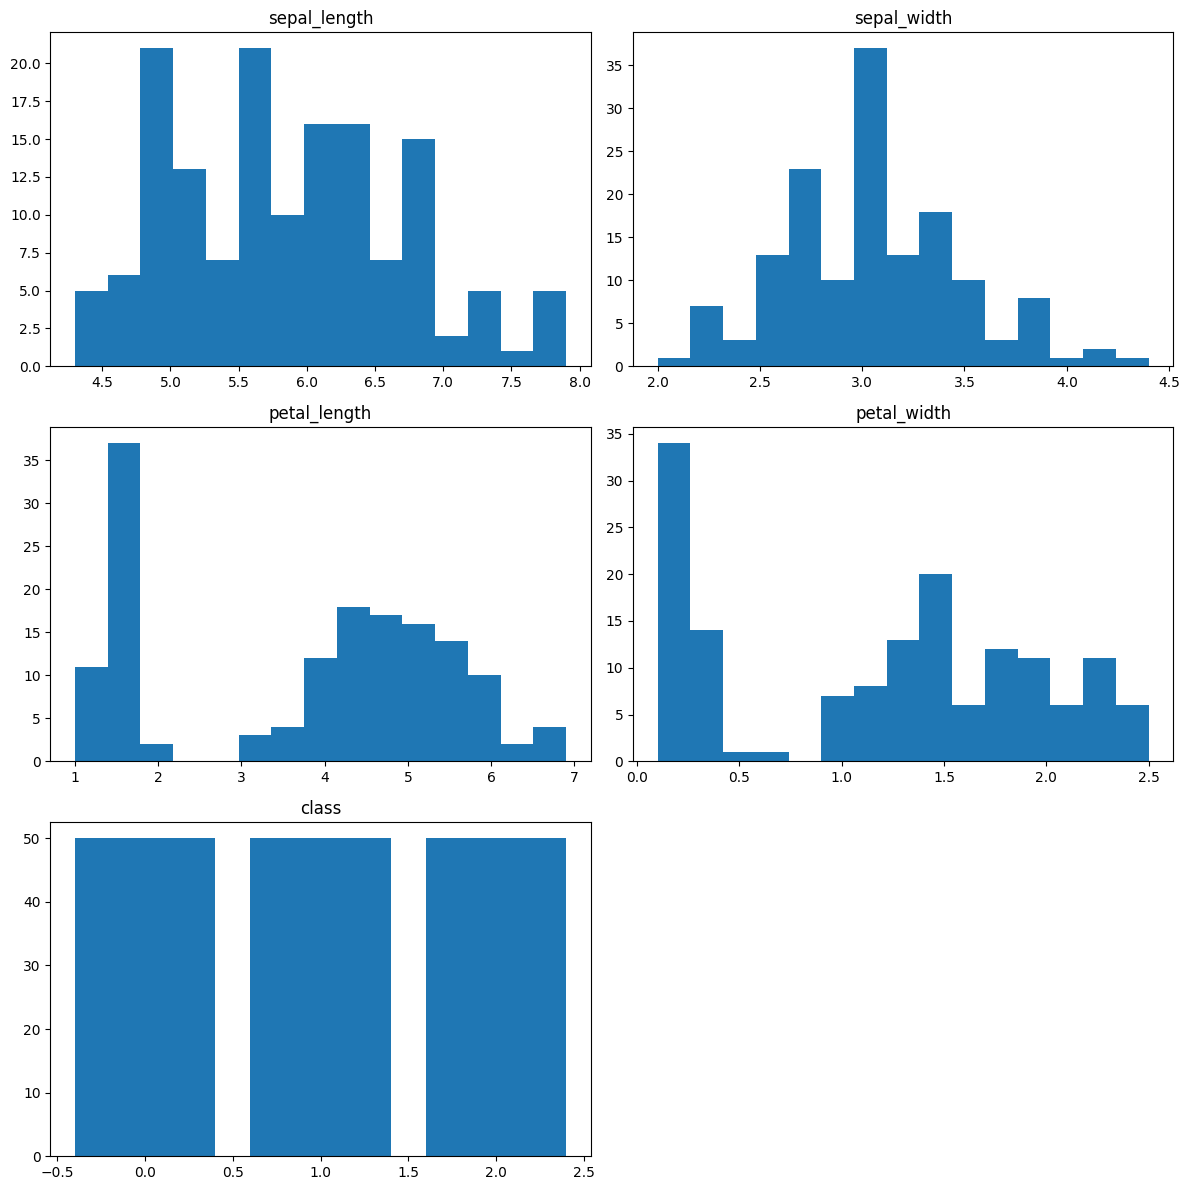

In [6]:
# YOUR CODE HERE

iris_url = "https://raw.githubusercontent.com/EpistasisLab/pmlb/master/datasets/iris/iris.tsv.gz"

df = pd.DataFrame(
    iris.data,
    columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]
)
df["class"] = iris.target
df.sample(10)
df.head()

cols = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

plt.figure(figsize=(12, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    if col == "class":
        # class is categorical (0, 1, 2)
        plt.hist(df[col], bins=[-0.5, 0.5, 1.5, 2.5], rwidth=0.8)
    else:
        plt.hist(df[col], bins=15)
    plt.title(col)
    plt.tight_layout()
plt.show()

YOUR ANSWERS HERE
1. sepal_length 
    Bell shaped. Approximately Normal Distribution
2. sepal_width 
    Uneven, slightly skewed with one peak. Skewed Normal Distribution.
3. petal_length 
    More than one peak. Mixture of Underlying Distribtution, Multimodal Distribution
4. petal_width 
    More than one peak. Mixture of Distribtution, Multimodal Distribution
5. class 
    Three distinct Values. Not a continuous measurement. Discrete Categorical Distribution 


### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

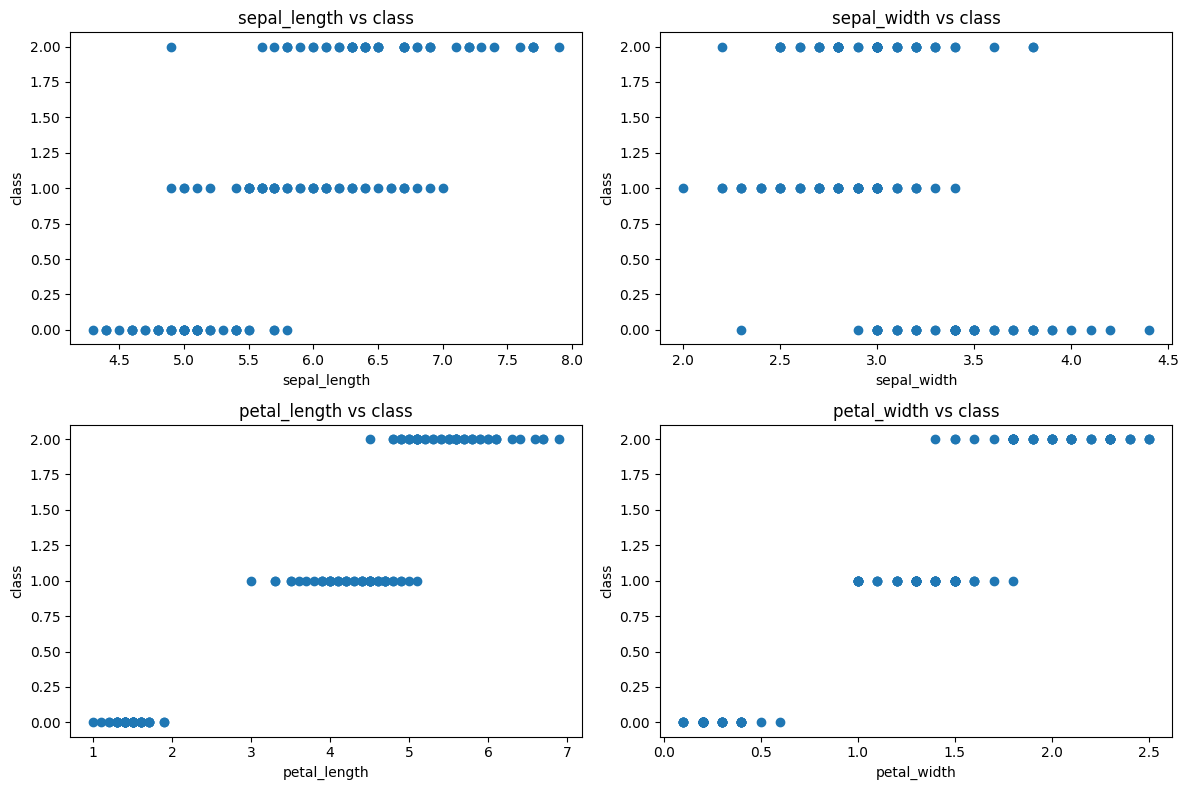

In [7]:
# YOUR CODE HERE

inputcols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
outputcols = ["class"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(inputcols, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[col], df["class"])
    plt.xlabel(col)
    plt.ylabel("class") 
    plt.title(f"{col} vs class")

plt.tight_layout()  
plt.show()


YOUR ANSWERS HERE
1. sepal_length vs. class
    Not Independent. The points form three horz bands. Setosa is shorter, Virginica is longer, and Versicolor is in between. Cluster is based on species, sepal length depends on class.
2. sepal_width vs. class
    Not Independent. More overalap than the others. Cluster is visbile. Seotsa has wider sepals and the others have tighter groupings. Speal width is related to class, seperation is weak. 
3. petal_length vs. class 
    Strongly Not Independent. There is a clear seperation. Setosa has short, versicolor has medium, and virginica has long petals. These are three distinct sets with no overlap and length correlates to species. 
4. petal_width vs. class
     Strongly Not Independent. Three seperate groups. Setosa has narrow, versicolor is middle, and viginica is the wideest. The class determines petal widths.    

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

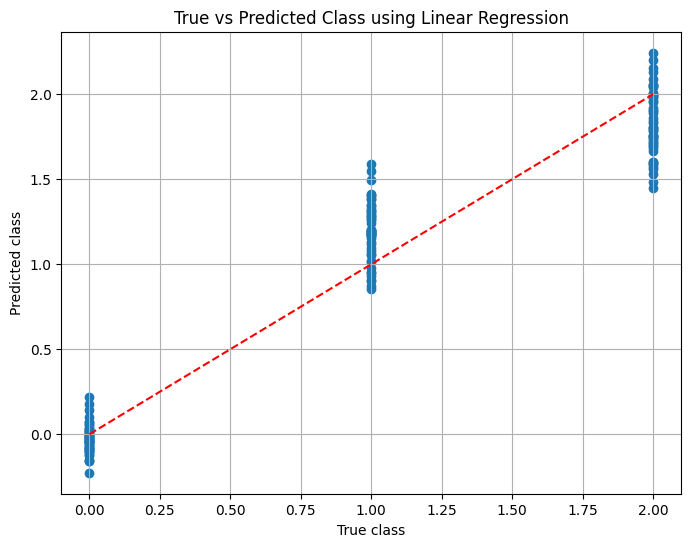

In [8]:
# YOUR CODE HERE

X = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = df["class"]

olsmodel = sklearn.linear_model.LinearRegression()
olsmodel.fit(X, y)

y_pred = olsmodel.predict(X)

mse = np.mean((y - y_pred) ** 2)
mse

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.xlabel("True class")
plt.ylabel("Predicted class")
plt.title("True vs Predicted Class using Linear Regression")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.grid(True)
plt.show()  


YOUR ANSWERS HERE

1. ordinary least squares (OLS)
    The OLS uses four inputs ["sepal_length", "sepal_width", "petal_length", "petal_width"] to predict the class labels. 
2. mean square 
    The MSE represents how far the prediction of class labels are from that of the class values averages. 
3. Actual vs. Prediction 
    The comparison between actual class numbers and the predictions, using regression analysis, indicates whether the spread is perfect or poor. 

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [9]:
# YOUR CODE HERE

q6inputs = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
q6output = ["class"]

mse = {}

for input_col in q6inputs:
    X_col = df[[input_col]]
    y = df["class"]
    
    olsmodel = sklearn.linear_model.LinearRegression()
    olsmodel.fit(X_col, y)
    y_pred = olsmodel.predict(X_col)

    mse[input_col] = np.mean((y - y_pred) ** 2)
mse



{'sepal_length': np.float64(0.25839861231192535),
 'sepal_width': np.float64(0.5453088838855342),
 'petal_length': np.float64(0.06622209338537158),
 'petal_width': np.float64(0.056678133311360075)}

YOUR ANSWERS HERE
1. MSEs indicate that the petal_width goves the best linear model due to the lowest MSE. 
2. This compares to Q5 which uses four columns which has a lower MSE than the single variables. The best predictor is the petal_width; howver, the full model predicts more accurately than the single. 

#here

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

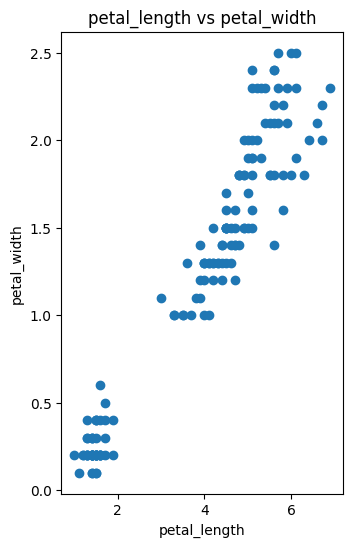

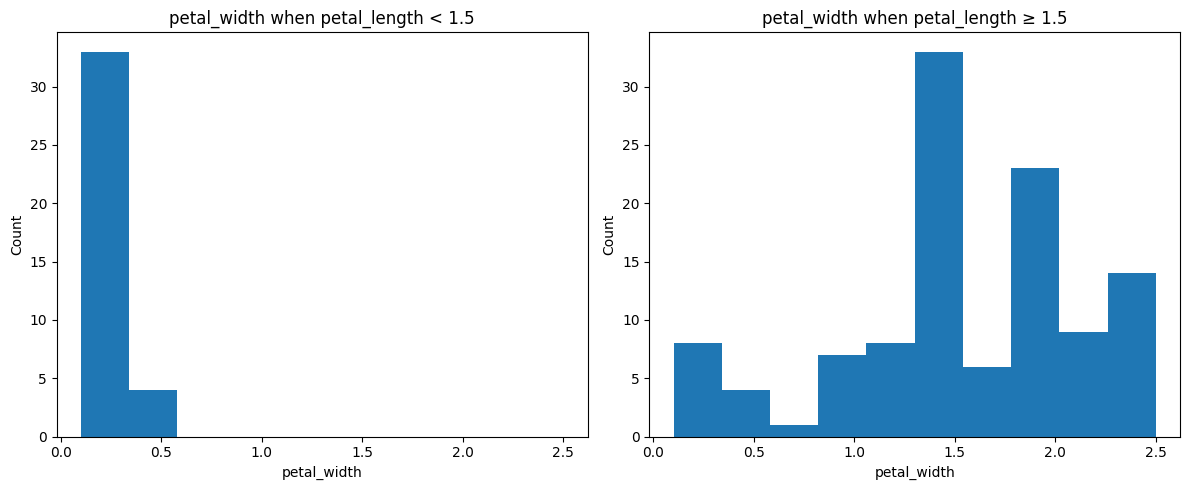

In [14]:
# YOUR CODE HERE

x = "petal_length"
y = "petal_width"

t = 1.5

left = df[df[x] <= t][y]
right = df[df[x] > t][y]

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.scatter(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"{x} vs {y}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(left, bins=10, range=(df[y].min(), df[y].max()))
plt.title(f"{y} when {x} < {t}")
plt.xlabel(y)
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(right, bins=10, range=(df[y].min(), df[y].max()))
plt.title(f"{y} when {x} ≥ {t}")
plt.xlabel(y)
plt.ylabel("Count")

plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

1. There is a strong dependency among flowers with short petals and those with narrow petals and flowers with longer petals that have wider petals.
2. t = 1.5. Petal length < 1.5 are flowers that are all setosas. Petal length ≥ 1.5 are flowers that are setosa, versicolor, and virginica. 
3. Hitogram for petal length < 1.5 are between 0.1 and 0.4 which indicate there are distinct differences with sertosa that have short and narrow petals. 
4. Hitogram for petal length ≥ 1.5 are between 1.0 and 2.5 which indicates a significance with versicolor and virginica which have widcer and longer petals. 
5. The difference between the two histograms indicates dependency between petal lenght and width.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [11]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [12]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [13]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE